! pip install sentence-transformers

⚠️ This model is deprecated. Please don't use it as it produces sentence embeddings of low quality. You can find recommended sentence embedding models here: SBERT.net - Pretrained Models

In [ ]:
# Make sure your numpy version should be less than 2
# pip install "numpy<2"
# pip install setuptools

import numpy as np
print(np.__version__)

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [25]:
from sentence_transformers import SentenceTransformer

# Original sBERT model
model = SentenceTransformer("bert-base-nli-mean-tokens", device='mps')
model

SentenceTransformer(
  (0): Transformer({'max_seq_length': 128, 'do_lower_case': False}) with Transformer model: BertModel 
  (1): Pooling({'word_embedding_dimension': 768, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False, 'include_prompt': True})
)

In [26]:
sentences = [
    "The product broke after just one use. It's a complete waste of money.",
    "The customer service was outstanding. They resolved my issue in no time.",
    "The customer service was rude and unhelpful. They didn't solve my issue.",
    "This restaurant has the best food I've ever tasted. Highly recommended!",
    "The food at the restaurant was bland and overpriced. I won't be returning.",
]

In [27]:
embeddings = model.encode(sentences)
embeddings

array([[ 0.04416141,  0.85962325,  0.322908  , ..., -0.10212316,
         0.02912107,  0.10300066],
       [-0.6835112 ,  0.2801528 ,  1.2093686 , ...,  0.21245642,
        -0.5346687 ,  0.01558512],
       [ 0.4265857 ,  1.0221977 ,  1.0565615 , ...,  0.3642277 ,
        -0.6256373 ,  0.33249593],
       [-0.5096379 ,  0.66958654,  0.17746992, ..., -0.31705126,
        -0.03200574, -0.42053893],
       [ 0.31733373,  1.0328041 ,  0.39055634, ...,  0.3772787 ,
        -0.1045844 , -0.15634419]], dtype=float32)

In [28]:
embeddings.shape

(5, 768)

In [29]:
# Semantic Search
similarities = model.similarity(embeddings, embeddings)
similarities

tensor([[1.0000, 0.3871, 0.7833, 0.2568, 0.6498],
        [0.3871, 1.0000, 0.3689, 0.5924, 0.3290],
        [0.7833, 0.3689, 1.0000, 0.2112, 0.6950],
        [0.2568, 0.5924, 0.2112, 1.0000, 0.3831],
        [0.6498, 0.3290, 0.6950, 0.3831, 1.0000]])

In [30]:
import numpy as np
from sentence_transformers.util import cos_sim

sim = np.zeros((len(sentences), len(sentences)))

for i in range(len(sentences)):
    sim[i:, i] = cos_sim(embeddings[i], embeddings[i:])

sim

array([[1.        , 0.        , 0.        , 0.        , 0.        ],
       [0.3870562 , 0.99999988, 0.        , 0.        , 0.        ],
       [0.78332233, 0.36885166, 0.99999994, 0.        , 0.        ],
       [0.25681293, 0.59236181, 0.2111831 , 0.99999994, 0.        ],
       [0.64977181, 0.32903916, 0.69502127, 0.3830719 , 1.00000012]])

<Axes: >

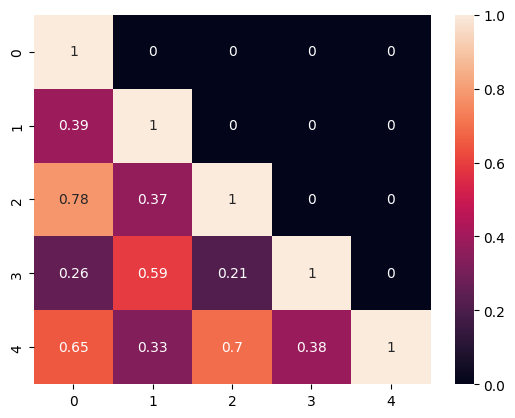

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(sim, annot=True)

# Another Model
The all-* models were trained on all available training data (more than 1 billion training pairs) and are designed as general purpose models. The all-mpnet-base-v2 model provides the best quality, while all-MiniLM-L6-v2 is 5 times faster and still offers good quality. Toggle All models to see all evaluated original models.

https://www.sbert.net/docs/sentence_transformer/pretrained_models.html

In [17]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer("all-mpnet-base-v2", device='mps')
model

SentenceTransformer(
  (0): Transformer({'max_seq_length': 384, 'do_lower_case': False}) with Transformer model: MPNetModel 
  (1): Pooling({'word_embedding_dimension': 768, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False, 'include_prompt': True})
  (2): Normalize()
)

In [18]:
sentences = [
    "The product broke after just one use. It's a complete waste of money.",
    "The customer service was outstanding. They resolved my issue in no time.",
    "The customer service was rude and unhelpful. They didn't solve my issue.",
    "This restaurant has the best food I've ever tasted. Highly recommended!",
    "The food at the restaurant was bland and overpriced. I won't be returning.",
]

In [20]:
embeddings = model.encode(sentences)
embeddings

array([[-0.00564942, -0.06335307, -0.04110138, ..., -0.00896022,
        -0.06124579, -0.05317215],
       [ 0.02449037, -0.0197929 , -0.0039826 , ...,  0.00816083,
        -0.01272321,  0.01008017],
       [ 0.0168136 , -0.04026268,  0.01347185, ...,  0.01396876,
        -0.00425833,  0.0085893 ],
       [-0.01469973,  0.05580642, -0.01199606, ...,  0.01834516,
         0.05696285, -0.0175186 ],
       [ 0.01376889,  0.05660284, -0.00071043, ...,  0.02251705,
         0.0137848 , -0.00466841]], dtype=float32)

In [21]:
embeddings.shape

(5, 768)

In [22]:
# Semantic Search
similarities = model.similarity(embeddings, embeddings)
similarities

tensor([[1.0000, 0.2027, 0.3146, 0.0878, 0.2101],
        [0.2027, 1.0000, 0.8990, 0.2488, 0.3188],
        [0.3146, 0.8990, 1.0000, 0.2024, 0.3506],
        [0.0878, 0.2488, 0.2024, 1.0000, 0.6916],
        [0.2101, 0.3188, 0.3506, 0.6916, 1.0000]])

In [23]:
import numpy as np
from sentence_transformers.util import cos_sim

sim = np.zeros((len(sentences), len(sentences)))

for i in range(len(sentences)):
    sim[i:, i] = cos_sim(embeddings[i], embeddings[i:])

sim

array([[1.        , 0.        , 0.        , 0.        , 0.        ],
       [0.20271082, 1.00000012, 0.        , 0.        , 0.        ],
       [0.31464747, 0.89902711, 1.        , 0.        , 0.        ],
       [0.08775529, 0.2487684 , 0.20236152, 1.00000012, 0.        ],
       [0.21014681, 0.31883687, 0.35061213, 0.69163859, 1.00000024]])

<Axes: >

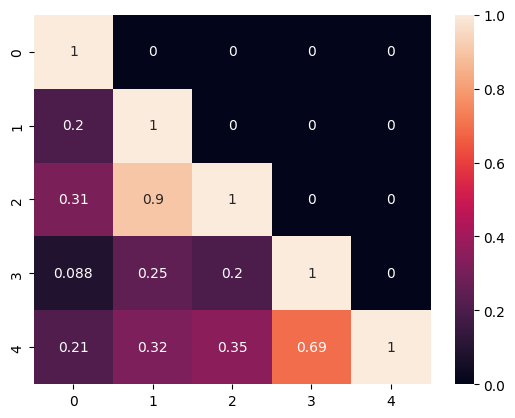

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(sim, annot=True)

# Embeddings:
1. Word-Level Embeddings:
    - Remember, word-level embeddings are like name tags for each toy (word). They help us understand what each toy is, as a whole.
    - Example: "car" = [whole toy car]

2. Token-Level Embeddings:
    - Token-level embeddings are like special labels for each small part of the toy (word). They help us understand what each part (token) is, and how they work together to make the whole toy (word).
    - Example: "car" = ["c" = [sound], "a" = [sound], "r" = [sound]]

3. Sentence-Level Embeddings:
    - Sentence-level embeddings are like a special summary label for a group of toys (words) that are played together! They help us understand what the whole group (sentence) means.
    - Example: "The cat chased the car" = [summary label for the whole sentence]